In [1]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1333, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 1333 (delta 213), reused 190 (delta 187), pack-reused 1074
Receiving objects: 100% (1333/1333), 10.00 MiB | 34.59 MiB/s, done.
Resolving deltas: 100% (721/721), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 28.3 MB/s 
     |████████████████████████████████| 13.1 MB 58.1 MB/s 
     |████████████████████████████████| 2.0 MB 57.0 MB/s 
     |████████████████████████████████| 235 kB 62.3 MB/s 
     |████████████████████████████████| 51 kB 8.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!nvidia-smi

Sun Jul 24 02:34:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z99EAjEhCexFY5pm8r5K")
project = rf.workspace("project-hvrqf").project("weapon-detection-3-0fcni")
dataset = project.version(2).download("mt-yolov6")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Weapon-Detection-3-2 in mt-yolov6:: 100%|██████████| 7079/7079 [00:06<00:00, 1097.14it/s]


In [8]:
# run this cell to begin training
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 20 --img-size 416 --data {dataset.location}/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='/content/YOLOv6/Weapon-Detection-3-2/data.yaml', device='0', dist_url='env://', epochs=20, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp1', workers=8, world_size=1)

Train: Final numbers of valid images: 3093/ labels: 3093. 
0.0s for dataset initialization.
Convert to COCO format
100% 294/294 [00:00<00:00, 107042.13it/s]
Convert to COCO format finished. Resutls saved in Weapon-Detection-3-2/annotations/instances_valid.json
Val: Final numbers of valid images: 294/ labels: 294. 
0.1s for dataset initialization.
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rbr_dense): Sequential(
        (conv): Conv2d

In [10]:
# Run evaluation
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --device 0 


Namespace(batch_size=32, conf_thres=0.001, data='/content/YOLOv6/Weapon-Detection-3-2/data.yaml', device='0', half=False, img_size=416, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp1/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.62
Val: Checking formats of labels with 2 process(es): 
294 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 294/294 [00:00<00:00, 4014.34it/s]
Convert to COCO format
100% 294/294 [00:00<00:00, 74934.70it/s]
Convert to COCO format finished. Resutls saved i

In [11]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --source {dataset.location}/images/test/ --device 0


Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='/content/YOLOv6/Weapon-Detection-3-2/images/test/', view_img=False, weights='runs/train/exp1/weights/best_ckpt.pt', yaml='/content/YOLOv6/Weapon-Detection-3-2/data.yaml')
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 147/147 [00:03<00:00, 42.84it/s]
Results saved to runs/inference/exp


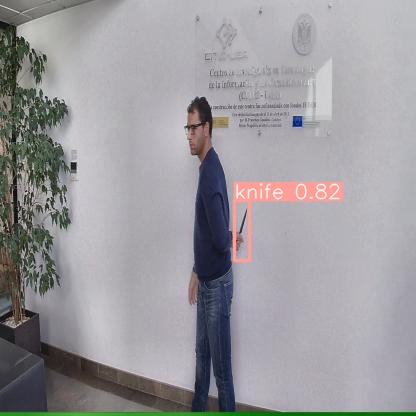

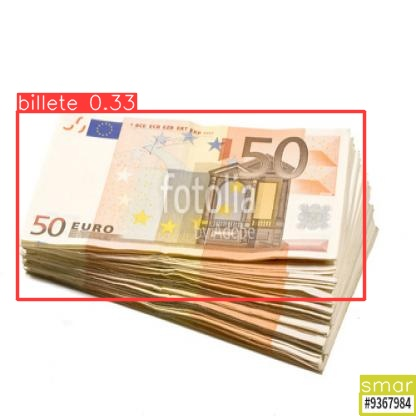

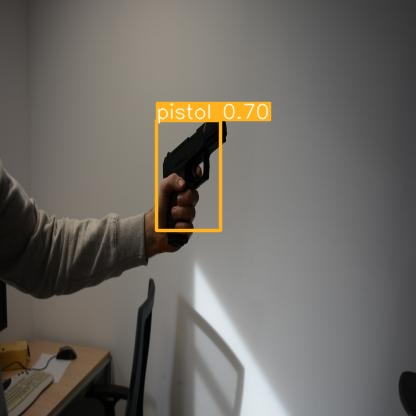

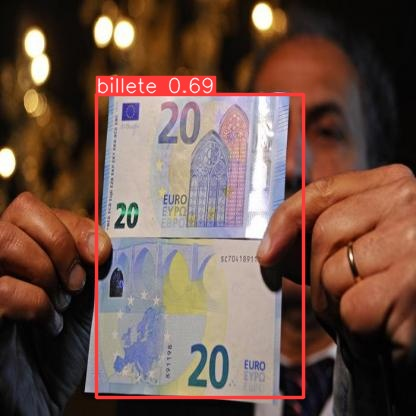

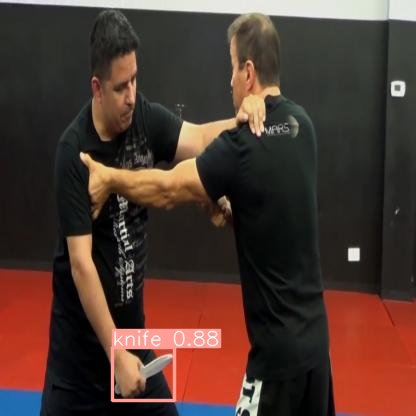

In [14]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 5 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1